In [1]:
import sys
sys.path.insert(1, '../')
import nirfasteruff as uff
import visualize
import scipy.io as sio
import numpy as np

In [2]:
# Let's load 3D volume. This particular one is a segmented ICBM152 head from NeuroDOT
# Note that the data type must be uint8
vol = sio.loadmat('headvol.mat')['mask']
# Load the optode information as well. This is the example 24x28 pad in NeuroDOT
tmp = sio.loadmat('optode_information.mat')
link = tmp['link']
srcpos = tmp['srcpos']
detpos = tmp['detpos']

In [3]:
# We can now build a NIRFAST mesh using one single command
# For the purpose of demonstration, lets use only a subset of optodes, and change that later
# By default, they are not fixed
source1 = uff.base.optode(srcpos[:5,:])
detector1 = uff.base.optode(detpos[:8,:])
# The optode objects are only half-finished at this point: there no int_func. But it's ok
print(source1.int_func)
# change the meshing parameter, in this case, I keep everything defaul except for turning smoothing off
# offset is added so the mesh lines up correctly with the optodes
params = uff.utils.MeshingParams(lloyd_smooth=0, offset=np.array([-87., -124.,  -76.4]))
# optical property
prop = np.array([[1, 0.004, 0.3, 1.33],
                [2, 0.0208, 1.0107, 1.33],
                [3, 0.0192, 0.6726, 1.33],
                 [4, 0.0139, 0.84, 1.33],
                 [5, 0.0190, 0.64, 1.33]])

[]


In [4]:
# Let's make the mesh
mesh = uff.base.stndmesh()
mesh.from_volume(vol, param=params, prop=prop, src=source1, det=detector1, link=link)
print(mesh.nodes.min(axis=0))
print(mesh.nodes.max(axis=0))

Running CGAL mesher
Meshing...

Running local optimization...

Converting to NIRFAST format
[ -87.03782607 -118.55319707  -73.9763377 ]
[88.03034001 83.06352392 98.658891  ]


In [5]:
# Now the missing optode information should be automatically filled. Have a look
print(mesh.source.num)
print(mesh.source.int_func)
print(mesh.meas.num)
print(mesh.meas.int_func)
# The optodes locations are also automatically adjusted, if they are not fixed
# Let's have a look
print(source1.coord[0,:])
print(mesh.source.coord[0,:])

[1. 2. 3. 4. 5.]
[[7.88370000e+04 8.34471832e-02 1.88645224e-01 1.76801008e-01
  5.51106586e-01]
 [1.73166000e+05 2.47813796e-01 3.98892075e-01 3.32852832e-01
  2.04412969e-02]
 [2.44576000e+05 4.03798348e-02 4.12142153e-01 2.91547856e-01
  2.55930156e-01]
 [3.65471000e+05 7.98486314e-02 1.45295813e-02 4.89246399e-01
  4.16375388e-01]
 [5.23418000e+05 1.15781030e-01 1.20744836e-01 4.42089391e-01
  3.21384743e-01]]
[1. 2. 3. 4. 5. 6. 7. 8.]
[[ 2.95307000e+05  1.75992442e-01  2.84461675e-01  5.39545883e-01
   1.67366121e-14]
 [ 2.13900000e+04  6.84951384e-01  2.34740791e-01  8.03078251e-02
  -1.86031746e-14]
 [ 2.19371000e+05  7.45635089e-01  2.27472978e-02  2.31617613e-01
   3.41948692e-14]
 [ 4.95657000e+05  6.99997486e-01  2.79491263e-01  2.05112514e-02
  -5.19584376e-14]
 [ 4.97404000e+05  1.98569846e-01  1.08429612e-02  7.90587192e-01
   5.85087534e-14]
 [ 1.11998000e+05  9.42023480e-02  4.24669658e-01 -3.18235022e-14
   4.81127994e-01]
 [ 8.38160000e+04  5.83813285e-01  1.91061282e

In [6]:
# Note: there is actually a mismatch between link and source/meas. The software doesn't check it, so be careful
# We can also change the optodes
mesh.source = uff.base.optode(srcpos)
mesh.meas = uff.base.optode(detpos)
# These are, again, missing information. Let's make sure they sit in mesh correctly
mesh.touch_optodes()

touching sources
touching detectors


In [7]:
# Have a look
print(mesh.source.num)
print(mesh.source.int_func)
print(mesh.meas.num)
print(mesh.meas.int_func)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24.]
[[7.88370000e+04 8.34471832e-02 1.88645224e-01 1.76801008e-01
  5.51106586e-01]
 [1.73166000e+05 2.47813796e-01 3.98892075e-01 3.32852832e-01
  2.04412969e-02]
 [2.44576000e+05 4.03798348e-02 4.12142153e-01 2.91547856e-01
  2.55930156e-01]
 [3.65471000e+05 7.98486314e-02 1.45295813e-02 4.89246399e-01
  4.16375388e-01]
 [5.23418000e+05 1.15781030e-01 1.20744836e-01 4.42089391e-01
  3.21384743e-01]
 [6.61940000e+04 4.16542532e-01 2.12861749e-02 1.24663337e-01
  4.37507956e-01]
 [2.70545000e+05 3.31210646e-01 1.16382224e-01 2.22747261e-01
  3.29659869e-01]
 [2.96079000e+05 2.48282948e-01 2.54923861e-01 3.85281493e-01
  1.11511698e-01]
 [9.29250000e+04 2.21289081e-01 6.00795844e-02 6.74722104e-01
  4.39092306e-02]
 [6.50335000e+05 1.22647621e-01 3.82982545e-01 7.15950061e-02
  4.22774828e-01]
 [5.82000000e+03 1.49617637e-01 1.59889164e-01 6.31052307e-01
  5.94408912e-02]
 [2.55260000e+05 1.04

In [8]:
# Let's make a regular grid, so we can map fluence to the grid space. 
# We only care about the back of the head
xgrid = np.arange(-87., 88., 3.)
ygrid = np.arange(-120., 40., 3.)
zgrid = np.arange(-75., 100., 3.)

# This can take a few seconds and heavily bottlenecked by CPU
mesh.gen_intmat(xgrid, ygrid, zgrid)

In [9]:
# Now let's generate some CW data
data,_=mesh.femdata(0)
# Data should be on grid now
print(data.phi.shape)

Calculating the MASS matrix
Solving the system
(54, 59, 59, 24)


/tmp/ipykernel_8395/501813850.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(data.phi[:,32,:,12]).squeeze().T, origin='lower')


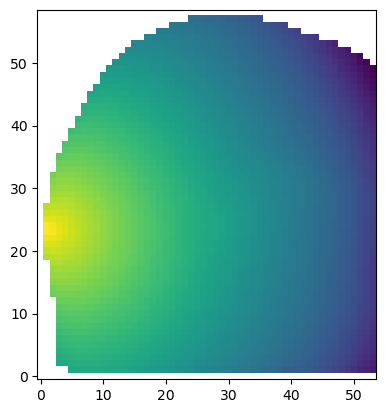

In [10]:
# Let's take a look at the fluence of source 13
import matplotlib.pyplot as plt
# if use this hack if plt crashes
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
plt.imshow(np.log(data.phi[:,32,:,12]).squeeze().T, origin='lower')

In [11]:
# You may also wish to add an anomaly to the mesh e.g. when simulating a function activation
# First make a copy of the mesh. Note that python by default uses shallow copy, 
# simplistically setting mesh2=mesh1 can cause unexpected artifacts
mesh2 = uff.base.stndmesh()
mesh2.from_copy(mesh)
# Let add a blob in the visual cortex
import scipy
idx = np.nonzero(scipy.linalg.norm(mesh2.nodes - np.array([9.,-90., -5.]), axis=1) < 15.)
# In format [mua (mm-1) musp (mm-1) ri]; can be NumPy array or list
mesh2.change_prop(idx, [0.03, 1.2, 1.33])

Calculating the MASS matrix
Solving the system


/tmp/ipykernel_8395/3360479058.py:4: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(data2.phi[:,32,:,12]).squeeze().T, origin='lower')


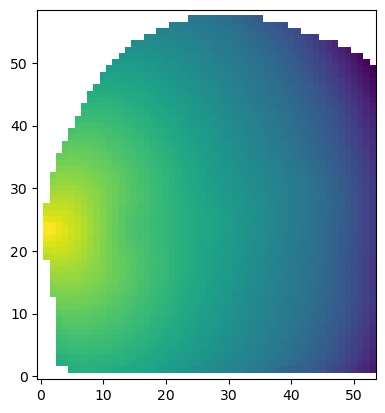

In [12]:
# Calculate fluence on the new mesh with anomaly
data2,_ = mesh2.femdata(0)
# Have a look at the same slice
plt.imshow(np.log(data2.phi[:,32,:,12]).squeeze().T, origin='lower')

/tmp/ipykernel_8395/3714853821.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(data2.phi[:,32,:,12].squeeze().T - data.phi[:,32,:,12].squeeze().T)), origin='lower')


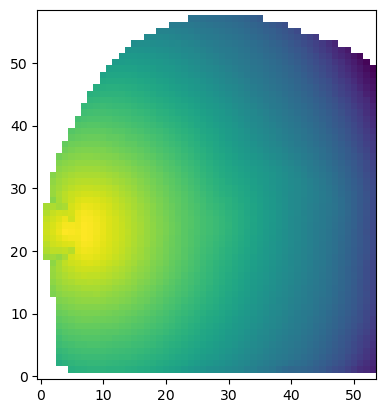

In [13]:
# Or better, view the difference (log absolute value)
plt.imshow(np.log(np.abs(data2.phi[:,32,:,12].squeeze().T - data.phi[:,32,:,12].squeeze().T)), origin='lower')

In [11]:
# That's it! Let's save the mesh in ASCII format, so we can repeat the same procedure in Matlab and compare
mesh.save_nirfast('fullhead_example')
# Maybe save the fluence as well
sio.savemat('phi_head.mat', {'phi':data.phi})